# Radial basis function neural networks
# Structure of RBF neural networks



An RBF neural network typically comprises three layers:

Input layer: This layer simply transmits the inputs to the neurons in the hidden layer.

Hidden layer: Each neuron in this layer applies a radial basis function to the inputs it receives.

Output layer: Each neuron in this layer computes a weighted sum of the outputs from the hidden layer, resulting in the final output.

# Preprocessing Boston Housing Dataset

In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Boston Housing dataset
data = load_boston()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [3]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

# Building a Radial Basis Function Neural Network 

In [4]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Choose the number of RBF centers
n_centers = 20

# Step 2: Select Centers using K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=42)
kmeans.fit(X_train_scaled)
centers = kmeans.cluster_centers_

# Step 3: Compute Activations
def gaussian_activation(x, center, width):
    return np.exp(-np.linalg.norm(x - center) ** 2 / (2 * width ** 2))

width = 1.0
hidden_layer_outputs_train = np.array([[gaussian_activation(x, center, width) for center in centers] for x in X_train_scaled])
hidden_layer_outputs_test = np.array([[gaussian_activation(x, center, width) for center in centers] for x in X_test_scaled])

# Step 4: Hidden Layer Outputs
hidden_layer_outputs_train = np.array(hidden_layer_outputs_train)
hidden_layer_outputs_test = np.array(hidden_layer_outputs_test)

# Step 5: Output Layer
output_model = LinearRegression()
output_model.fit(hidden_layer_outputs_train, y_train)

# Step 6: Predictions and Evaluation
predicted_train = output_model.predict(hidden_layer_outputs_train)
predicted_test = output_model.predict(hidden_layer_outputs_test)


# Visualizing Model Performance: Actual vs. Predicted Housing Prices

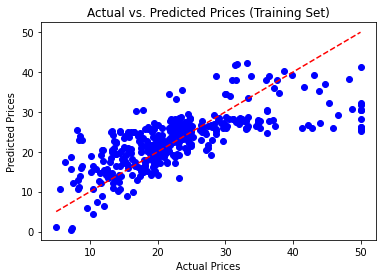

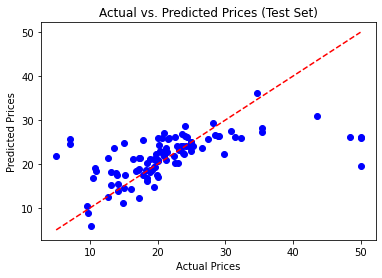

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values for training set
plt.scatter(y_train, predicted_train, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.show()

# Scatter plot of actual vs. predicted values for test set
plt.scatter(y_test, predicted_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Test Set)')
plt.show()


# Evaluating Model Performance

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared (R2) for training set
mse_train = mean_squared_error(y_train, predicted_train)
r2_train = r2_score(y_train, predicted_train)

print("Training Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for test set
mse_test = mean_squared_error(y_test, predicted_test)
r2_test = r2_score(y_test, predicted_test)

print("\nTest Set Metrics:")
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


Training Set Metrics:
Mean Squared Error: 43.39469134958073
R-squared: 0.5004835837557238

Test Set Metrics:
Mean Squared Error: 48.60803943945922
R-squared: 0.3371671643723616


# Generlization

In [7]:
# Assuming new_input is your new input data with 13 features
new_input = np.array([0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14])

# Reshape the new input to match the number of features (13)
new_input_reshaped = new_input.reshape(1, -1)

# Standardize the new input data
new_input_scaled = scaler.transform(new_input_reshaped)

# Compute Hidden Layer Activations
hidden_layer_activations = np.array([gaussian_activation(new_input_scaled, center, width) for center in centers])
hidden_layer_activations=hidden_layer_activations.reshape(1, -1)
# Make Prediction
predicted_output = output_model.predict(hidden_layer_activations)
print("Predicted Output:", predicted_output)

Predicted Output: [22.39946132]
